# Viewer Engagement with Educational Videos

In this data set we have 2  data csv files, 1st is the train.csv in which we have to make the model to predict the viewer engagement and we have to use that Machine Learning model on the 2nd dataframe test.csv

According to the dataset, The target variable is `engagement` which was defined as True if the median percentage of the video watched across all viewers was at least 30%, and False otherwise.

In [139]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',50)

In [140]:
train = pd.read_csv('train.csv')
train.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


In [141]:
test = pd.read_csv('test.csv')
test.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,9240,6,8.548351,14140,89.827395,0.640810,0.017945,2.262723,0.000000
1,9241,8,7.730110,14600,82.446667,0.606738,0.027708,2.690351,0.000000
2,9242,3,8.200887,16980,88.821542,0.621089,0.009857,3.116071,0.000000
3,9243,5,6.377299,16260,86.874660,0.600000,0.004348,2.837500,0.017994
4,9244,18,7.756530,14030,88.872277,0.616105,0.033240,1.354839,0.000000


Lets do the indexing as per the train data to the test data which typically means adding one more column in 'test.csv' as similar to the 'train.csv' which further will be the prediction colum

In [142]:
test = test.reindex(columns=train.columns, fill_value=0)
test.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,9240,6,8.548351,14140,89.827395,0.640810,0.017945,2.262723,0.000000,0
1,9241,8,7.730110,14600,82.446667,0.606738,0.027708,2.690351,0.000000,0
2,9242,3,8.200887,16980,88.821542,0.621089,0.009857,3.116071,0.000000,0
3,9243,5,6.377299,16260,86.874660,0.600000,0.004348,2.837500,0.017994,0
4,9244,18,7.756530,14030,88.872277,0.616105,0.033240,1.354839,0.000000,0


# Data Visualization

C:\Users\17pus\AppData\Local\Temp\ipykernel_12948\2919155073.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['easiness'])


<AxesSubplot: xlabel='easiness', ylabel='Density'>

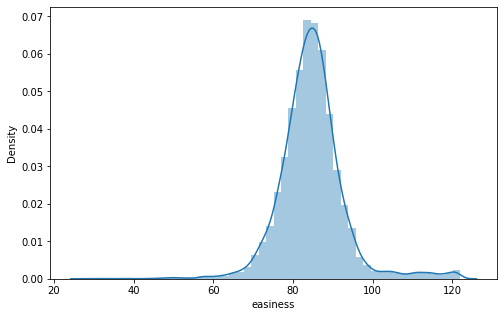

In [171]:
plt.figure(figsize = (8,5))
sns.distplot(train['easiness'])

In [146]:
train.drop('id', axis= 1, inplace = True)

Text(0.5, 1.0, 'Correlation')

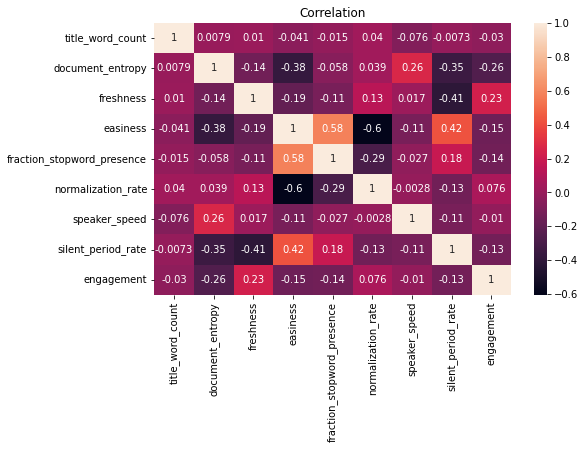

In [156]:
plt.figure(figsize = (8,5))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation')

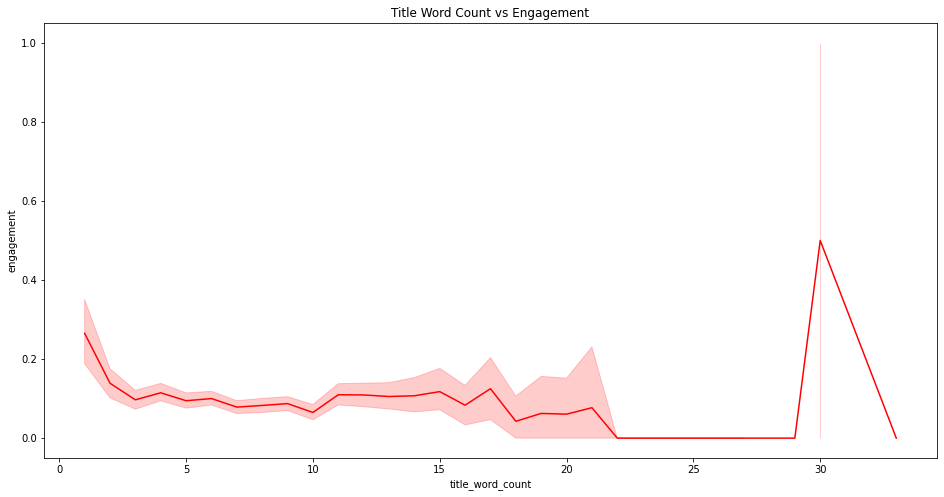

In [168]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = train, x = 'title_word_count', y= 'engagement', color = 'red')
plt.title('Title Word Count vs Engagement')
plt.show()

So, lets make a function engagement_model() and apply our machine learning model on the test data 'test.csv'

In [166]:
#%matplotlib notebook
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
pd.set_option('display.max_columns',50)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

def engagement_model():
    # Reading files:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    test = test.reindex(columns=train.columns, fill_value=0)

    # Create a label encoder object
    label_encoder = LabelEncoder()
    # Fit the label encoder to the training data
    label_encoder.fit(train["engagement"])
    # Transform the engagement column in the test dataframe using the transform method
    test["engagement_encoded"] = label_encoder.transform(test["engagement"])
    
    # Feature names and train test split
    feature_names = ['title_word_count', 'document_entropy', 'freshness', 'easiness',
                     'fraction_stopword_presence', 'normalization_rate', 'speaker_speed',
                     'silent_period_rate']
    X = train[feature_names]
    y = train['engagement']
    test = test[feature_names]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    # Grid Search with Gradient Boosting
    # For getting integer values in prediction use RandomForestRegressor()
    model = GradientBoostingClassifier()
    param_grid = {'n_estimators':[5,7], 'max_depth':[5,10]}
    grid_search = GridSearchCV(model, param_grid, scoring="roc_auc")
    grid_result = grid_search.fit(X_train, y_train)
    
    # Taking the id column for printing the results
    test2 = pd.read_csv('test.csv')
    
    # summarize results
    print("Prediction on ID Values")
    return pd.DataFrame(grid_result.predict(test),test2["id"],columns=['engagement'])
    from sklearn.metrics import classification_report,confusion_matrix
    

Lets call our function "engagement_model" which will run the Machine learning model on the 'test.csv' and predict the viewer engagement

Here we will be printing the "id" and "engagement" as our prediction

In [167]:
engagement_model()

Prediction on ID Values


,engagement
id,
9240,False
9241,False
9242,False
9243,True
9244,False
...,...
11544,False
11545,False
11546,False
